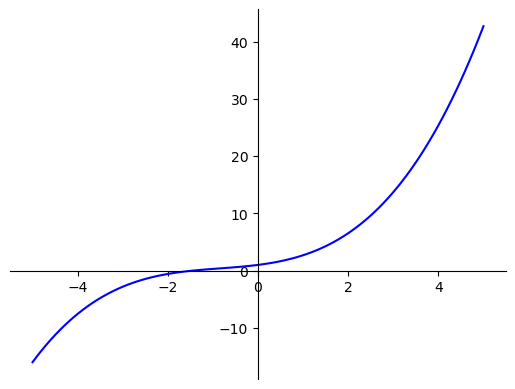

Многочлен с погрешностью имеет вид: P(x) = 0.195000000000022*x**3 + 0.494499999999988*x**2 + 1.00029999999999*x + 1.0
Многочлен без погрешности имеет вид: P(x) = 0.195*x**3 + 0.4945*x**2 + 1.0003*x + 1.0
В точке x = 0.15 функция принимает значение f(x) = 1.16182937500000


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *


def interpolation(points):
    y, x, s = symbols("y,x,s")
    y = 0
    for i in range(0, len(points)):
        s = 1
        for j in range(0, len(points)):
            if (i != j):
                s *= (x - float(points[j][0])) / float(float(points[i][0]) - float(points[j][0]))
        y += expand(s) * float(points[i][1])
    return y


def computeFunc(y, x, arr):
    newArr = []
    for i in range(0, len(arr)):
        newArr.append(float(y.subs(x, arr[i])))
    return newArr


points = []

with open('C:\\Users\hambi\source\jupyter\input.txt', 'r') as f:
    numOfPoints = int(f.readline())
    for i in range(0, numOfPoints):
        string = f.readline()
        points.append(list(map(float, string.split())))

y, x = symbols("y,x")

y = interpolation(points)

z = y.evalf(8)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

arr = np.linspace(-5, 5, 100)

plt.plot(arr, computeFunc(y, x, arr), 'b')
plt.show()

print("Многочлен с погрешностью имеет вид: P(x) = " + str(y))
print("Многочлен без погрешности имеет вид: P(x) = " + str(z))
print("В точке x = 0.15 функция принимает значение f(x) =", y.subs(x, 0.15))
